In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [10]:
x_train.shape              #3d(number,height,width)

(60000, 28, 28)

In [12]:
single_img  = x_train[0]

In [13]:
single_img.shape

(28, 28)

In [14]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We can use matplotlib lib to see 2d array objects by using imshow()

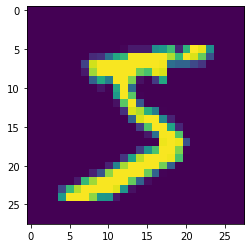

In [15]:
plt.imshow(single_img)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
 from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [19]:
y_example=to_categorical(y_train)

In [20]:
y_example.shape

(60000, 10)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test=to_categorical(y_test)

In [23]:
y_cat_train=to_categorical(y_train)

we can use scaling our data here simply just by dividing by 255.

In [28]:
x_train=x_train/255

In [29]:
x_test=x_test/255

In [31]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

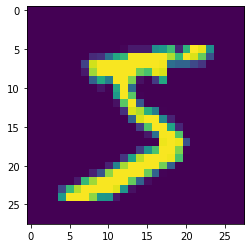

In [33]:
plt.imshow(x_train[0])      #it wil still work coz ratio is stil same

In [34]:
x_train.shape

(60000, 28, 28)

We need to tell the model that we dealing with 1 channel i.e only grey not 3 channels ie rgb(red green blue)

In [35]:
x_train=x_train.reshape(60000,28,28,1)

In [37]:
x_test=x_test.reshape(10000,28,28,1)

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [42]:
model=Sequential()
#padding can be valid or same ,here we have size of img 28 by 28 and pur kernel size is 4 so 28/4=7 ie a perfect no so there will be np overshooting and our kernel will stride easily so we choose valid otherwise choose same.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu',padding='valid'))
#take the max value from the pool
model.add(MaxPool2D(pool_size=(2,2)))
#now we flatten the img ie 28*28
model.add(Flatten())
#use relu for hidden layers
model.add(Dense(128,activation='relu'))
#use softmax for output useful in multiple classification and its probalities sum upto 1.
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [46]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1447 - val_loss: 0.0581
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0475 - val_loss: 0.0425
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0302 - val_loss: 0.0359
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0203 - val_loss: 0.0382


In [47]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

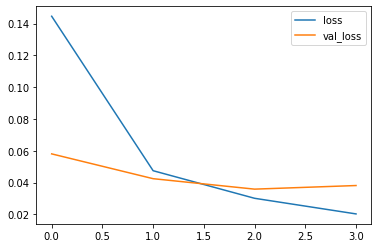

In [49]:
losses.plot()

In [50]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0382


0.038175709545612335

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 9ms/step


In [54]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       0.99      1.00      0.99      1135\n           2       0.99      0.99      0.99      1032\n           3       0.99      0.99      0.99      1010\n           4       0.98      0.99      0.99       982\n           5       0.97      0.99      0.98       892\n           6       0.99      0.99      0.99       958\n           7       0.99      0.99      0.99      1028\n           8       0.98      0.99      0.98       974\n           9       1.00      0.96      0.98      1009\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

In [56]:
confusion_matrix(y_test,predictions)

array([[ 969,    0,    2,    1,    0,    3,    3,    0,    2,    0],
       [   0, 1130,    0,    0,    0,    3,    1,    0,    1,    0],
       [   0,    2, 1022,    0,    1,    0,    0,    3,    4,    0],
       [   0,    0,    1, 1004,    0,    1,    0,    1,    3,    0],
       [   0,    0,    0,    0,  977,    0,    3,    0,    0,    2],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   2,    2,    0,    0,    1,    3,  949,    0,    1,    0],
       [   1,    0,    9,    0,    0,    0,    0, 1016,    1,    1],
       [   2,    0,    2,    1,    3,    3,    1,    1,  960,    1],
       [   0,    3,    1,    5,   12,   11,    0,    4,    7,  966]],
      dtype=int64)

In [64]:
new=x_test[0]

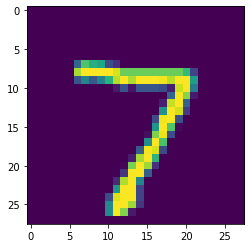

In [65]:
plt.imshow(new.reshape(28,28))

In [66]:
(np.argmax(model.predict(new.reshape(1,28,28,1)),axis=1))

1/1 [==============================] - 0s 43ms/step


array([7], dtype=int64)